In [1]:
# 2)	Read the two dataframes
import pandas as pd
confirmed_cases_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
deaths_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
confirmed_cases_df = pd.read_csv(confirmed_cases_url)
deaths_df = pd.read_csv(deaths_url)

In [2]:
# deaths dataframe
deaths_df.head() 

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/26/22,11/27/22,11/28/22,11/29/22,11/30/22,12/1/22,12/2/22,12/3/22,12/4/22,12/5/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7833,7833,7833,7833,7833,7834,7834,7834,7834,7835
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3594,3594,3594,3594,3594,3594,3594,3594,3594,3594
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,156,156,156,156,157,157,157,157,157,157
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1923,1923,1923,1923,1924,1924,1924,1924,1924,1925


In [3]:
# confirmed cases dataframe
confirmed_cases_df.head() 

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/26/22,11/27/22,11/28/22,11/29/22,11/30/22,12/1/22,12/2/22,12/3/22,12/4/22,12/5/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,205612,205612,205802,205830,205907,206073,206133,206145,206206,206273
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,333322,333330,333330,333338,333343,333360,333381,333391,333408,333413
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271061,271061,271079,271082,271090,271096,271100,271102,271107,271113
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,46824,46824,46824,46824,47219,47219,47219,47219,47219,47219
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,104491,104491,104491,104491,104676,104676,104676,104676,104676,104750


In [4]:
# 3) Using pandas to create a dataframe that aggregates and sums both confirmed cases and deaths on a global level
confirmed_cases_df.drop(['Lat','Long','Province/State'],axis=1,inplace=True)
deaths_df.drop(['Lat','Long','Province/State'],axis=1,inplace=True)

confirmed_cases_df = confirmed_cases_df.melt(['Country/Region'],var_name="Date",value_name='Confirmed cases')
deaths_df = deaths_df.melt(['Country/Region'],var_name="Date",value_name='Deaths')

combined_df = pd.merge(deaths_df,confirmed_cases_df,how="left",on=["Country/Region","Date"])
combined_df['Date'] = pd.to_datetime(combined_df['Date'], errors ='coerce')
combined_df['Month'] = combined_df['Date'].dt.month
combined_df['Year']= combined_df['Date'].dt.year

total_count_df = combined_df.groupby(["Month",'Year'])['Deaths', 'Confirmed cases'].sum().reset_index()

combined_df.drop('Country/Region',axis=1,inplace=True)
total_count_df

C:\Users\GOHIL\AppData\Local\Temp\ipykernel_6224\3796190702.py:13: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  total_count_df = combined_df.groupby(["Month",'Year'])['Deaths', 'Confirmed cases'].sum().reset_index()


,Month,Year,Deaths,Confirmed cases
0,1,2020,30256,1293895
1,1,2021,153849366,5928223234
2,1,2022,318977900,24137346265
3,2,2020,1579856,55594837
4,2,2021,166435187,6319497310
5,2,2022,302642889,28370153842
6,3,2020,4330844,102357235
7,3,2021,201133832,7774336234
8,3,2022,351252282,35938535527
9,4,2020,25063541,253534057


In [5]:
"""
Stocks selected for the industries are listed below : 
Overall American market - NASDX
Overall Canadian market - S&P/TSX
Travel sector - Booking Holdings (BKNG)
Real estate - Prologis, Inc. (PLD)
Precious metals - Newmont Corporation (NEM)

"""

'\nStocks selected for the industries are listed below : \nOverall American market - NASDX\nOverall Canadian market - S&P/TSX\nTravel sector - Booking Holdings (BKNG)\nReal estate - Prologis, Inc. (PLD)\nPrecious metals - Newmont Corporation (NEM)\n\n'

In [6]:
from alpha_vantage.timeseries import TimeSeries

In [7]:
api_key = "ZS9T8P58GIU3RR28"
ts = TimeSeries(key=api_key,output_format='pandas')

overall_american_stock = ts.get_weekly_adjusted('NASDX')
overall_canadian_stock = ts.get_weekly_adjusted('S&P/TSX')
travel_stock = ts.get_weekly_adjusted('BKNG') 
real_estate_stock = ts.get_weekly_adjusted('PLD')
precious_metal_stock = ts.get_weekly_adjusted('NEM')

In [8]:
overall_american_stock_df = pd.DataFrame(overall_american_stock[0]).reset_index()
overall_canadian_stock_df = pd.DataFrame(overall_canadian_stock[0]).reset_index()
travel_stock_df = pd.DataFrame(travel_stock[0]).reset_index()
real_estate_stock_df = pd.DataFrame(real_estate_stock[0]).reset_index()
precious_metal_stock_df = pd.DataFrame(precious_metal_stock[0]).reset_index()

In [9]:
# 5) Use AlphaVantage (the stock API used earlier in the course) to get the daily high and low prices for your selected stocks

for stock in [overall_american_stock_df,overall_canadian_stock_df,travel_stock_df,real_estate_stock_df,precious_metal_stock_df]:
    stock.rename(columns = {'date':'Date','2. high':'High','3. low':'Low'}, inplace = True)

overall_canadian_stock_df=overall_canadian_stock_df[['Date','High','Low']]
overall_canadian_stock_df['Date'] = pd.to_datetime(overall_canadian_stock_df['Date'], errors ='coerce')
overall_canadian_stock_df['Month'] = overall_canadian_stock_df['Date'].dt.month
overall_canadian_stock_df['Year']= overall_canadian_stock_df['Date'].dt.year

precious_metal_stock_df=precious_metal_stock_df[['Date','High','Low']]
precious_metal_stock_df['Date'] = pd.to_datetime(precious_metal_stock_df['Date'], errors ='coerce')
precious_metal_stock_df['Month'] = precious_metal_stock_df['Date'].dt.month
precious_metal_stock_df['Year']= precious_metal_stock_df['Date'].dt.year

C:\Users\GOHIL\AppData\Local\Temp\ipykernel_6224\65026147.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  precious_metal_stock_df['Date'] = pd.to_datetime(precious_metal_stock_df['Date'], errors ='coerce')
C:\Users\GOHIL\AppData\Local\Temp\ipykernel_6224\65026147.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  precious_metal_stock_df['Month'] = precious_metal_stock_df['Date'].dt.month
C:\Users\GOHIL\AppData\Local\Temp\ipykernel_6224\65026147.py:14: SettingWithCopyWarning: 
A value is trying to be 

In [10]:
#S&P/TSX
import numpy as np

df_final_canada = pd.merge(total_count_df,overall_canadian_stock_df,on=['Month','Year'])

df_final_canada

,Month,Year,Deaths,Confirmed cases,Date,High,Low
0,1,2022,318977900,24137346265,2022-01-28,44.8000,35.9000
1,1,2022,318977900,24137346265,2022-01-21,44.8000,39.7900
2,1,2022,318977900,24137346265,2022-01-14,50.1057,40.7400
3,1,2022,318977900,24137346265,2022-01-07,52.2900,41.4200
4,2,2022,302642889,28370153842,2022-02-25,40.2200,31.8300
...,...,...,...,...,...,...,...
70,12,2021,306736733,17852796980,2021-12-17,51.5000,43.3200
71,12,2021,306736733,17852796980,2021-12-10,52.4000,43.0000
72,12,2021,306736733,17852796980,2021-12-03,59.5400,44.1019
73,12,2022,64315496,8595206474,2022-12-05,14.9800,14.0500


<Figure size 640x480 with 0 Axes>

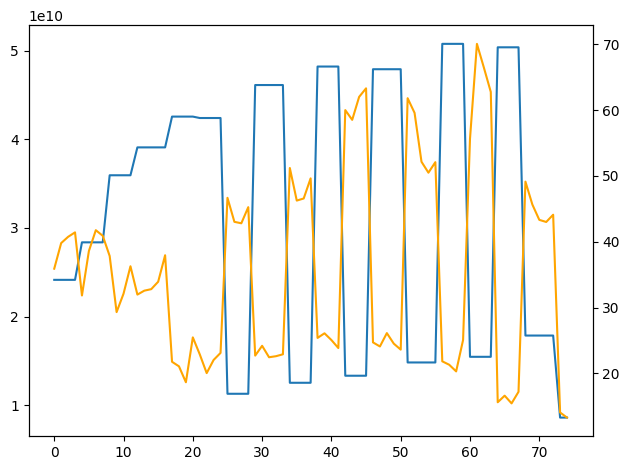

In [11]:
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig_zoom_sfm = plt.gcf()

fig_zoom_sfm, ax1 = plt.subplots()
ax1.plot(df_final_canada['Confirmed cases'])
ax2 = ax1.twinx()
ax2.plot(df_final_canada['Low'],color="orange")
fig_zoom_sfm.tight_layout()
plt.show()

In [12]:
# Booking Holdings (BKNG)

df_final_precious=pd.merge(total_count_df,precious_metal_stock_df,on=['Month','Year'])

df_final_precious

,Month,Year,Deaths,Confirmed cases,Date,High,Low
0,1,2020,30256,1293895,2020-01-31,45.410,43.7400
1,1,2020,30256,1293895,2020-01-24,44.360,43.0900
2,1,2020,30256,1293895,2020-01-17,44.010,42.1100
3,1,2020,30256,1293895,2020-01-10,43.850,41.5500
4,1,2020,30256,1293895,2020-01-03,44.080,42.7900
...,...,...,...,...,...,...,...
149,12,2021,306736733,17852796980,2021-12-17,60.570,53.1600
150,12,2021,306736733,17852796980,2021-12-10,56.765,54.7900
151,12,2021,306736733,17852796980,2021-12-03,56.520,52.6000
152,12,2022,64315496,8595206474,2022-12-05,48.690,47.1631


<Figure size 640x480 with 0 Axes>

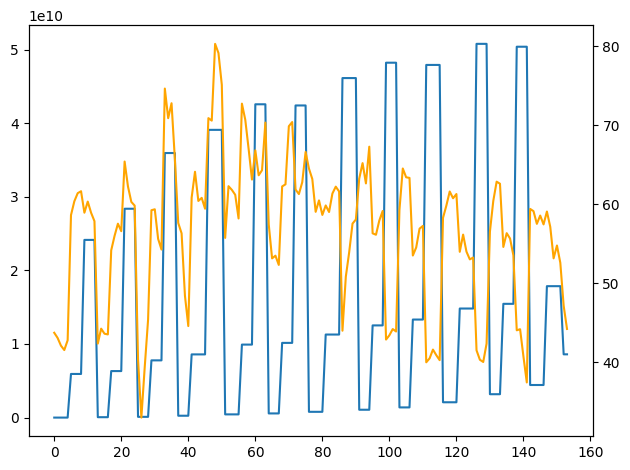

In [13]:
fig_zoom_sfm = plt.gcf()

fig_zoom_sfm, ax1 = plt.subplots()
ax1.plot(df_final_precious['Confirmed cases'])
ax2 = ax1.twinx()
ax2.plot(df_final_precious['Low'],color="orange")
fig_zoom_sfm.tight_layout()
plt.show()